<a href="https://colab.research.google.com/github/ROSILENE05/Analise_dados_Python-Arquitetura_EmpresaTI/blob/main/Desafio_tecnico_SENAI_GO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pipelines



1-Defina o Objetivo;

2-Escolha a Ferramenta ou Plataforma;

3-Planeje os Estágios (Tasks ou Steps);

4-Projete o Fluxo de Dados ou de Controle;

5-Implemente o Primeiro Estágio (MVP - Minimum Viable Pipeline);

6-Teste e Monitore;

7-Itere e Melhore;






##**Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # para modelos "não supervisionado"
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




##**Carregamento dos dados**

In [3]:
# 1. Carregamento dos Dados
try:
    df = pd.read_csv('/dados.csv')
    print("Dados carregados com sucesso!")
    print(df.head())
except FileNotFoundError:
    print("Erro: O arquivo 'dados.csv' não foi encontrado.")
    exit()

Dados carregados com sucesso!
       A     B     C     D    E     F     G     H     I     J     L     M  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

      N  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  


##**Análise exploratória dos dados**


--- Distribuição das Variáveis ---

Variável: A
count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: A, dtype: float64


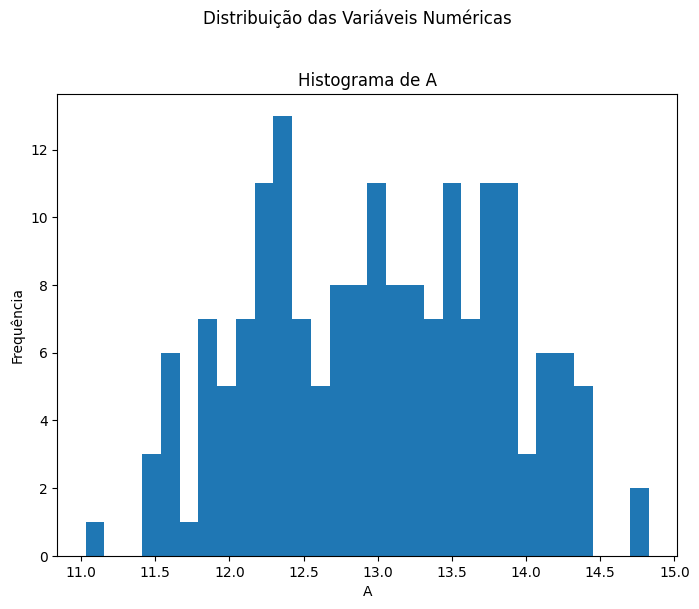


Variável: B
count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: B, dtype: float64


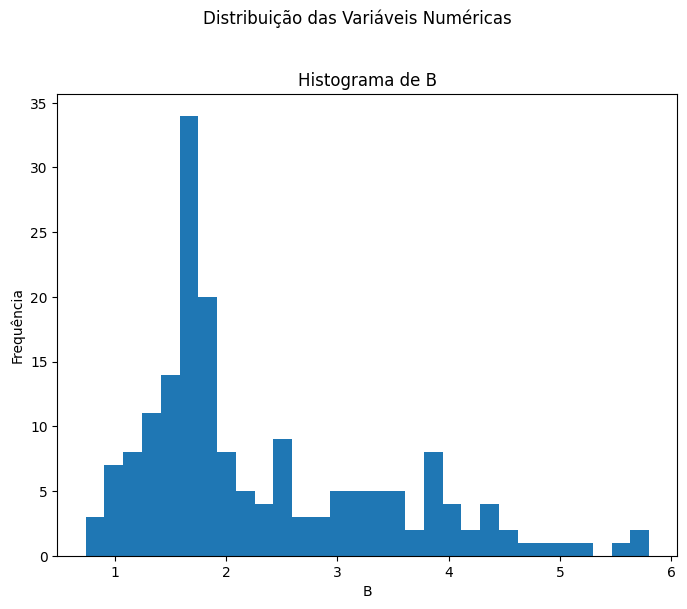


Variável: C
count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: C, dtype: float64


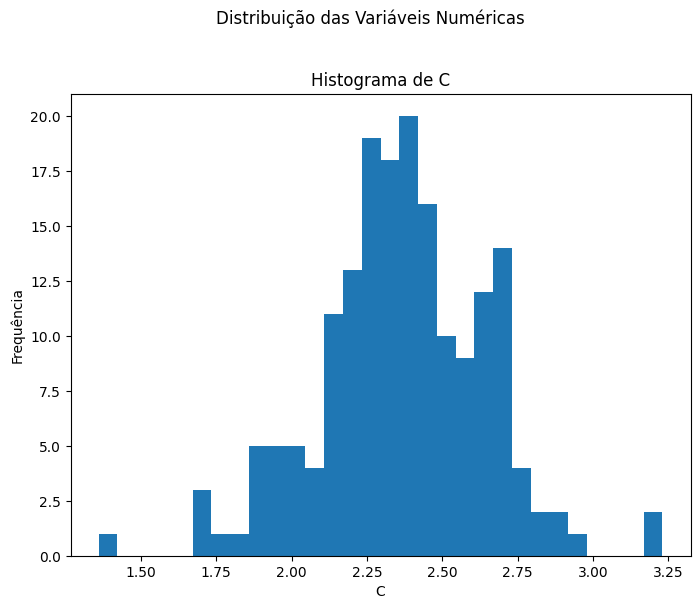


Variável: D
count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: D, dtype: float64


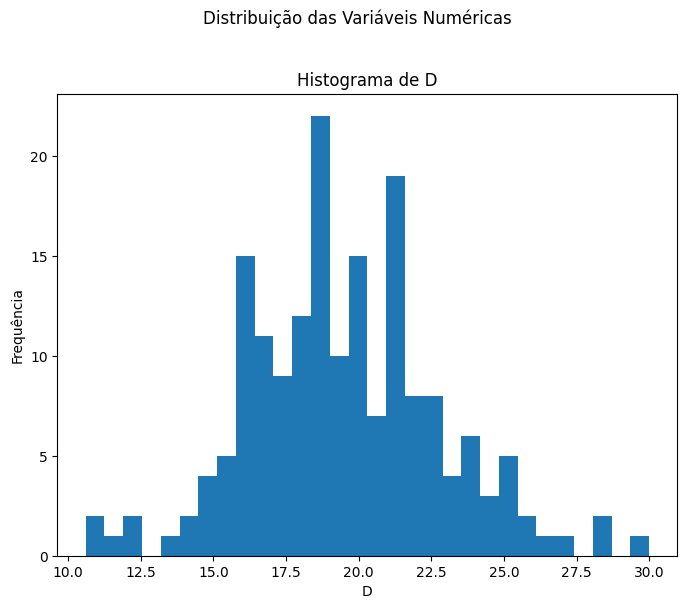


Variável: E
count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: E, dtype: float64


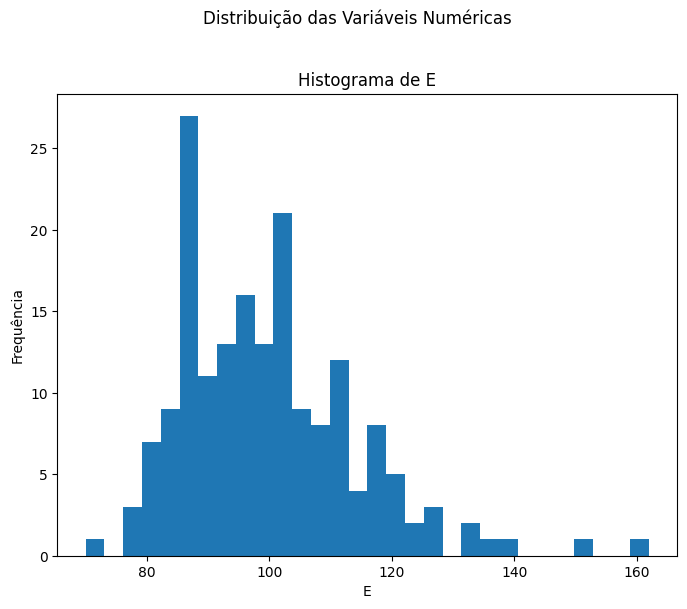


Variável: F
count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: F, dtype: float64


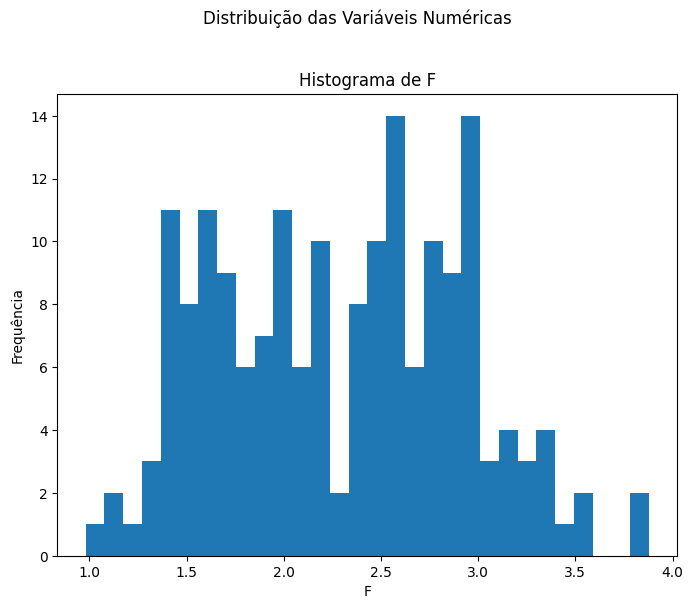


Variável: G
count    178.000000
mean       2.029270
std        0.998859
min        0.340000
25%        1.205000
50%        2.135000
75%        2.875000
max        5.080000
Name: G, dtype: float64


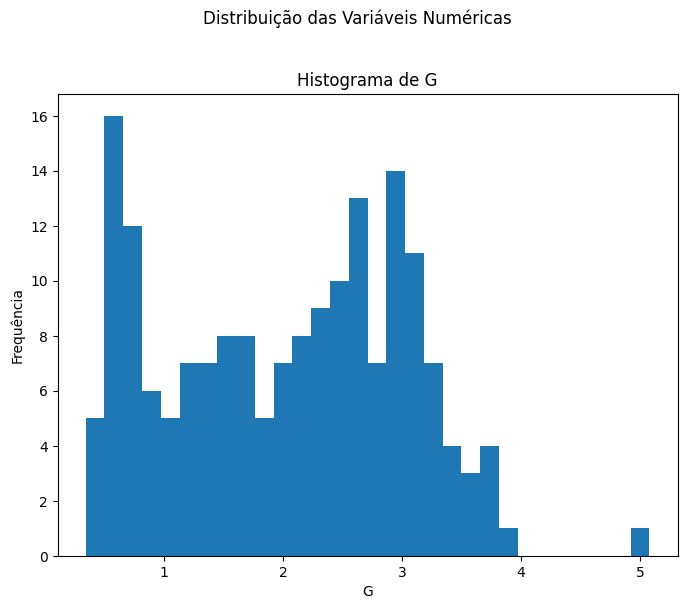


Variável: H
count    178.000000
mean       0.361854
std        0.124453
min        0.130000
25%        0.270000
50%        0.340000
75%        0.437500
max        0.660000
Name: H, dtype: float64


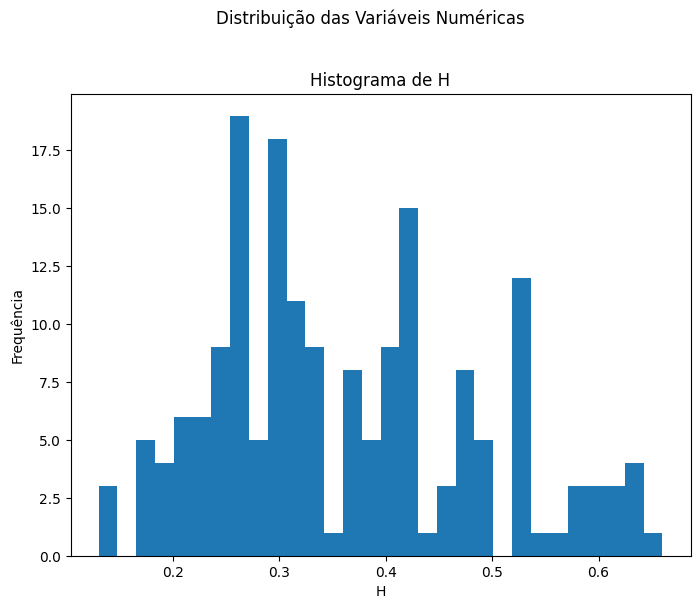


Variável: I
count    178.000000
mean       1.590899
std        0.572359
min        0.410000
25%        1.250000
50%        1.555000
75%        1.950000
max        3.580000
Name: I, dtype: float64


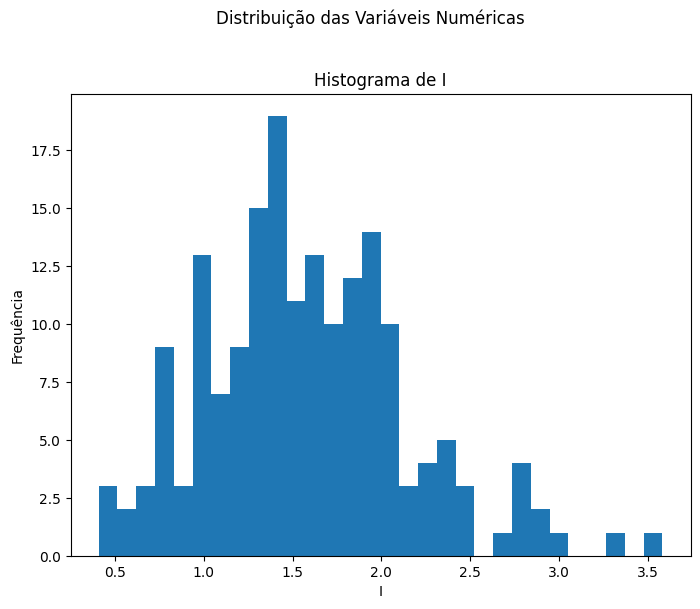


Variável: J
count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: J, dtype: float64


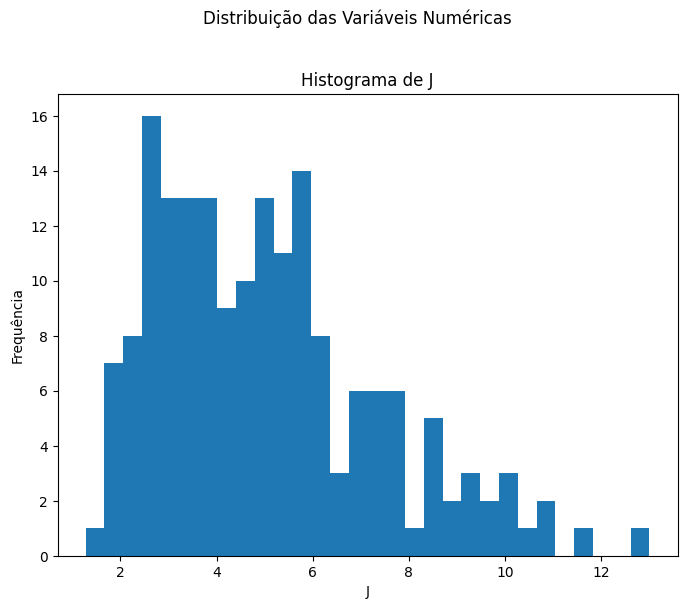


Variável: L
count    178.000000
mean       0.957449
std        0.228572
min        0.480000
25%        0.782500
50%        0.965000
75%        1.120000
max        1.710000
Name: L, dtype: float64


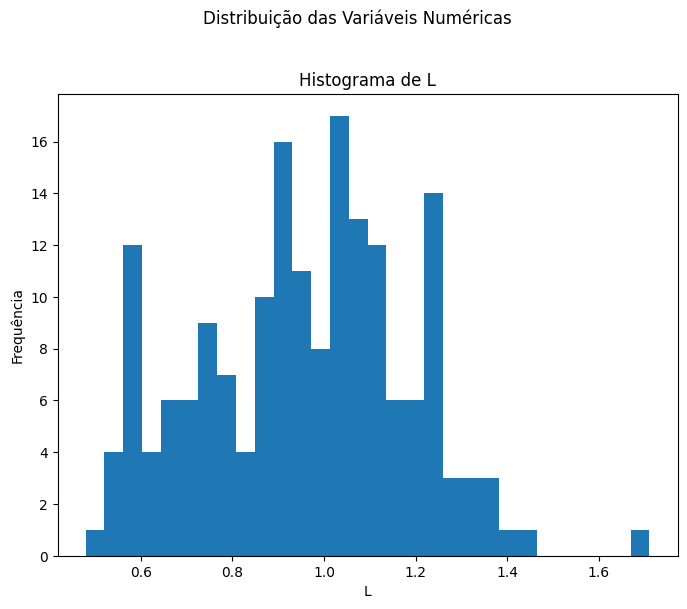


Variável: M
count    178.000000
mean       2.611685
std        0.709990
min        1.270000
25%        1.937500
50%        2.780000
75%        3.170000
max        4.000000
Name: M, dtype: float64


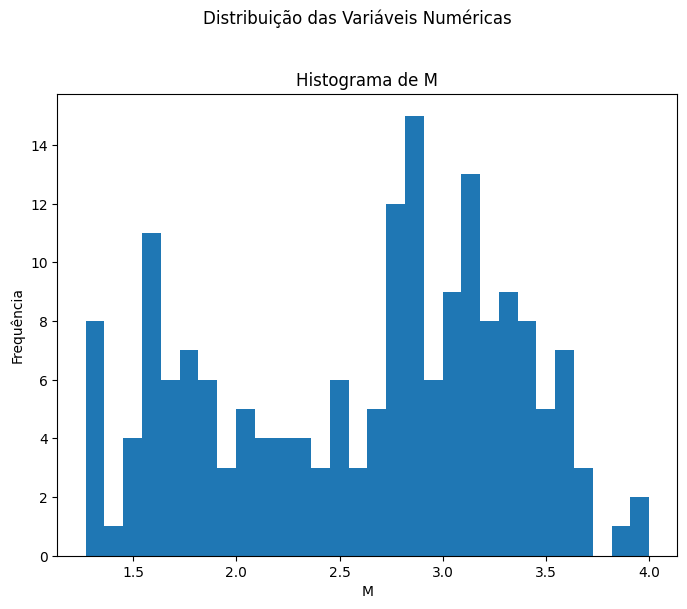


Variável: N
count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: N, dtype: float64


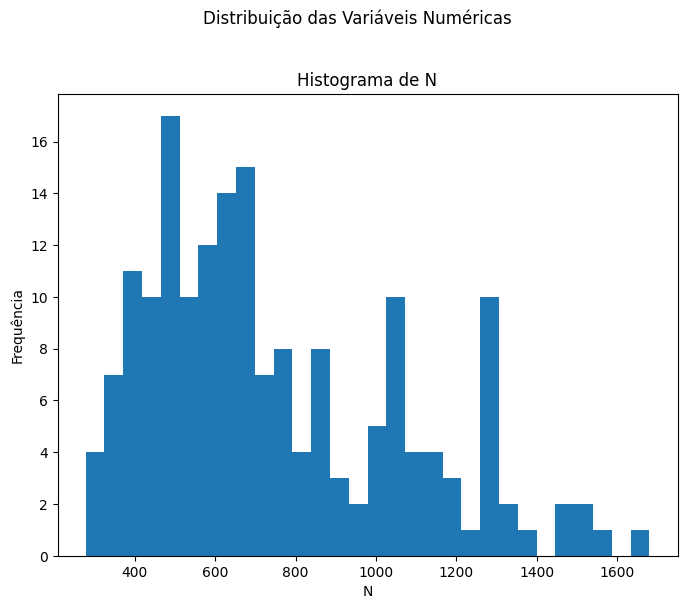

In [34]:
# prompt: gere hipoteses usando os dados

# Análise exploratória dos dados para gerar hipóteses

# 1. Distribuição das variáveis
print("\n--- Distribuição das Variáveis ---")
for col in df.columns:
    print(f"\nVariável: {col}")
    print(df[col].describe())
    # Histograma
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.suptitle("Distribuição das Variáveis Numéricas", y=1.02)
    plt.show()





--- Correlação entre as Variáveis ---


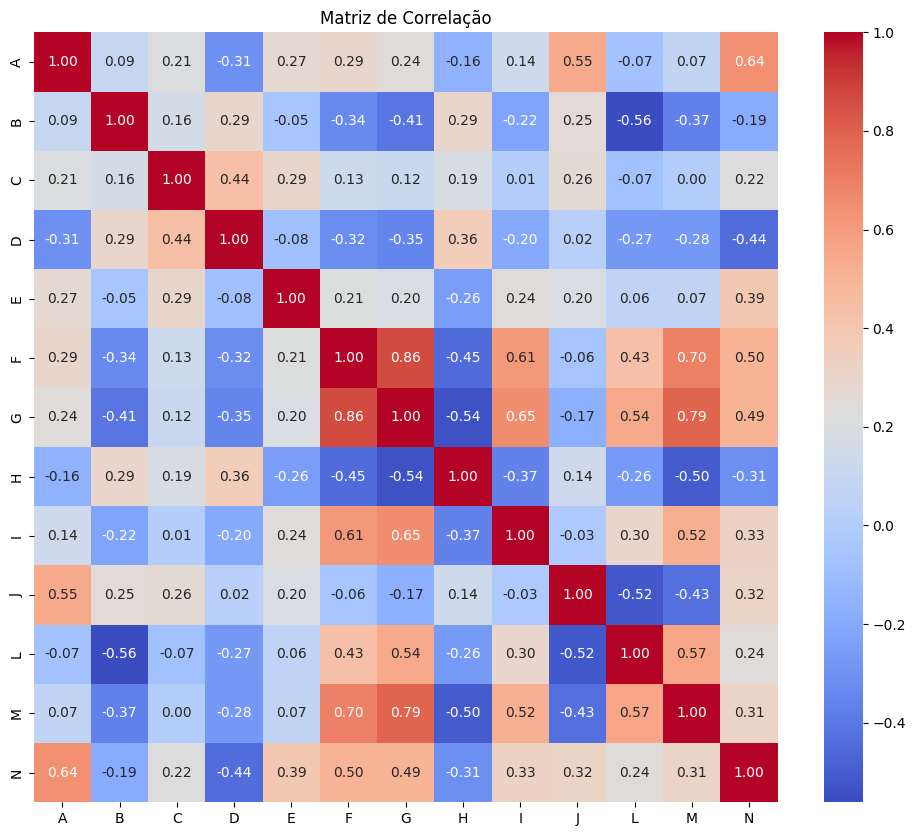

In [28]:
# 2. Correlação entre as variáveis (para variáveis numéricas)
print("\n--- Correlação entre as Variáveis ---")
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()




In [29]:
# 3. Análise das variáveis categóricas (se houver)
print("\n--- Análise das Variáveis Categóricas ---")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nVariável: {col}")
    print(df[col].value_counts())
    # Gráfico de barras
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Contagem de valores para {col}")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.show()





--- Análise das Variáveis Categóricas ---


In [30]:
# 4. Relação entre variáveis independentes e dependente (defina a variável alvo)
# Substitua 'target_variable' pelo nome da sua variável alvo
target_variable = 'YOUR_TARGET_VARIABLE' # EXEMPLO: 'target'
if target_variable in df.columns:
    print("\n--- Relação entre Variáveis Independentes e a Variável Alvo ---")
    for col in df.columns:
        if col != target_variable:
            if pd.api.types.is_numeric_dtype(df[col]) and pd.api.types.is_numeric_dtype(df[target_variable]):
              plt.figure(figsize=(8,6))
              plt.scatter(df[col], df[target_variable])
              plt.title(f'Relação entre {col} e {target_variable}')
              plt.xlabel(col)
              plt.ylabel(target_variable)
              plt.show()
            elif not pd.api.types.is_numeric_dtype(df[col]):
                # Boxplot para variáveis categóricas vs. variável alvo numérica
                if pd.api.types.is_numeric_dtype(df[target_variable]):
                    plt.figure(figsize=(10, 6))
                    sns.boxplot(x=col, y=target_variable, data=df)
                    plt.title(f'Relação entre {col} e {target_variable}')
                    plt.show()
                else:
                    print(f"Não foi possível plotar relação entre {col} e {target_variable}. Ambas variáveis devem ser numéricas ou uma categórica e outra numérica.")


    # ... (Adicione mais análises exploratórias conforme necessário)
else:
    print(f"Variável alvo '{target_variable}' não encontrada no DataFrame.")


Variável alvo 'YOUR_TARGET_VARIABLE' não encontrada no DataFrame.


In [5]:
# Descrição dos dados
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
                A           B           C           D           E           F  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

                G           H           I           J           L           M  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.029270    0.361854    1.590899    5.058090    0.957449    2.611685   


##**Visualização dos dados**

In [7]:
# Identificar colunas categóricas automaticamente
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # Add this line

# Contagem das variáveis categóricas
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Contagem da Variável Categórica: {col}")
    plt.show()

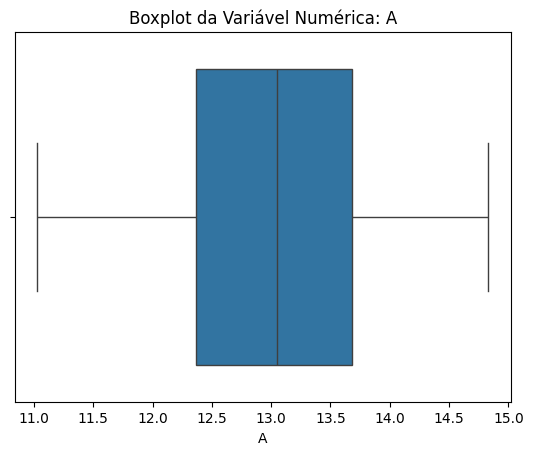

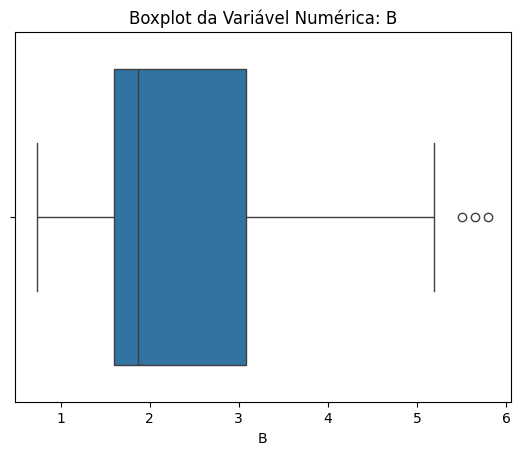

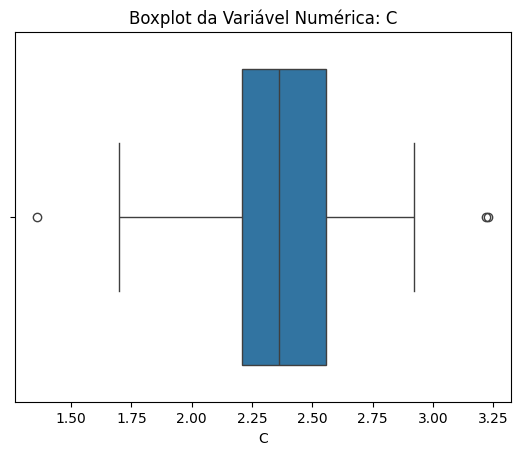

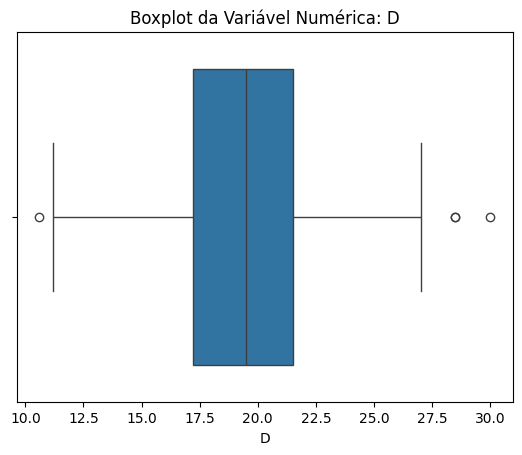

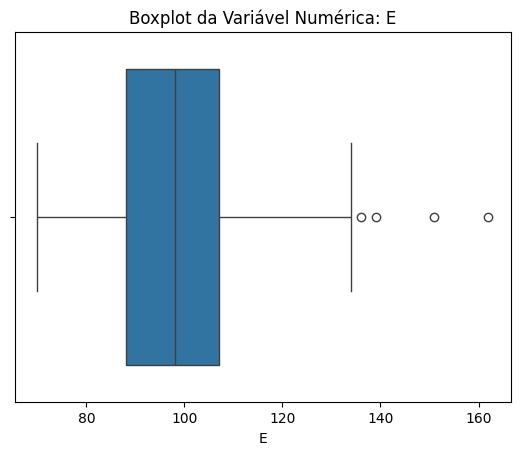

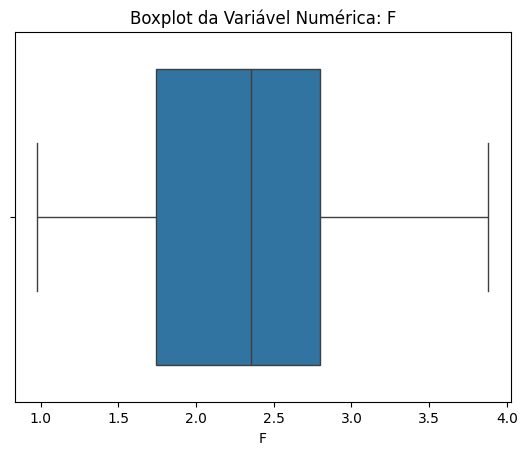

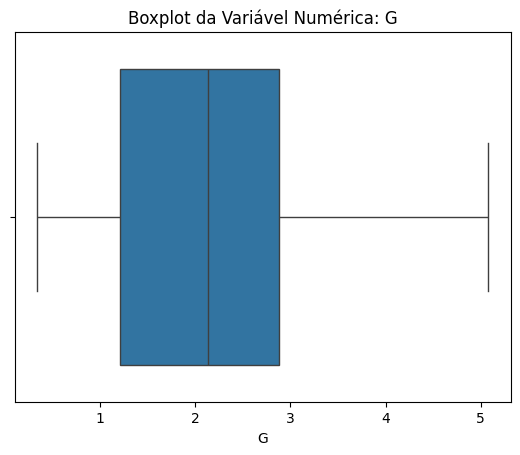

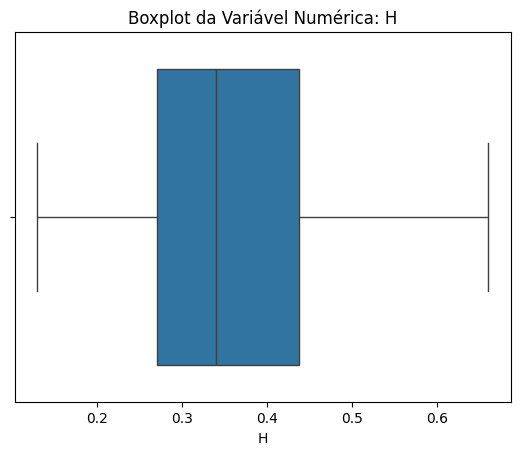

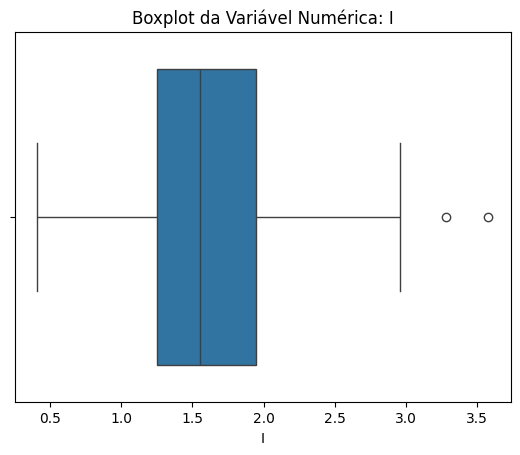

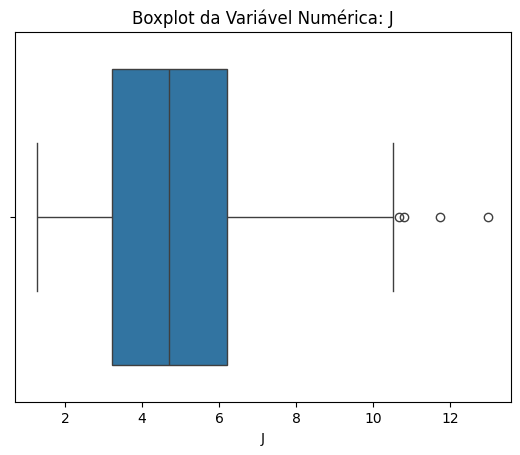

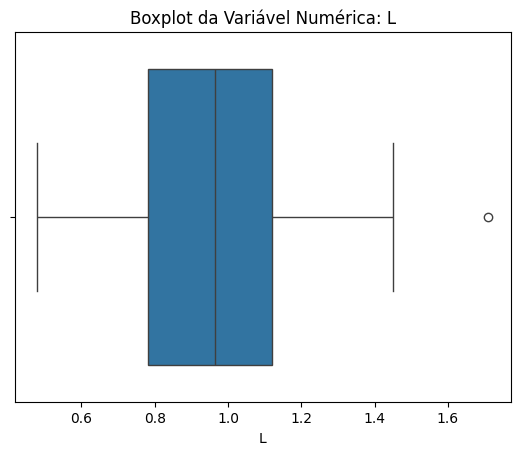

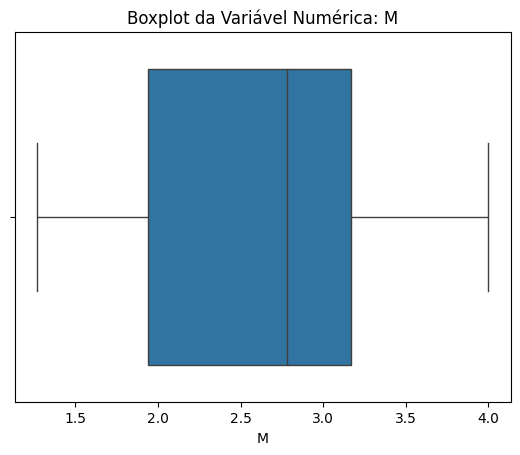

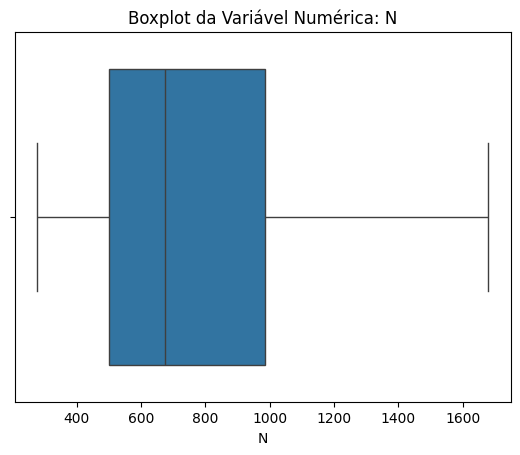

In [36]:
# Boxplots para identificar outliers (variáveis numéricas)
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot da Variável Numérica: {col}")
    plt.show()

##**Preparação dos dados**

In [10]:
# Verificar valores ausentes
df.isnull().sum()

,0
A,0
B,0
C,0
D,0
E,0
F,0
G,0
H,0
I,0
J,0


In [11]:
# Remover linhas com valores ausentes
df_sem_nulos = df.dropna()

In [12]:
# Preencher valores ausentes (com a média, mediana, um valor específico, etc.)
df_preenchido = df.fillna(df.mean())

# Preencher com a média de uma coluna
#df['sua_coluna'].fillna(df['sua_coluna'].mean(), inplace=True)

# Preencher com um valor específico
#df['outra_coluna'].fillna(0, inplace=True)


In [13]:
# Remover duplicatas
df_sem_duplicatas = df.drop_duplicates()

##**Divisão dos dados**

In [14]:
# Suponha que seus dados estejam em um array numpy chamado 'X'
# Cada linha de 'X' representa um ponto de dado e cada coluna uma característica.
# Exemplo de dados:
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])


In [15]:
# Defina o número de clusters desejado (por exemplo, 2 clusters)
n_clusters = 2

# Inicialize o modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# Ajuste o modelo aos seus dados e obtenha as etiquetas dos clusters
labels = kmeans.fit_predict(X)

# 'labels' agora é um array onde cada elemento indica a qual cluster o ponto de dado correspondente pertence.
print(labels)
# Saída esperada (a ordem pode variar): [0 0 1 1 0 1]
# Isso significa que o primeiro, segundo e quinto pontos foram atribuídos ao cluster 0,
# e o terceiro, quarto e sexto pontos foram atribuídos ao cluster 1



[1 1 0 0 1 0]


In [16]:
# Você também pode acessar os centros dos clusters:
centers = kmeans.cluster_centers_
print(centers)

# Saída esperada (aproximadamente): [[1.16666667 1.46666667] [7.33333333 9.66666667]]


[[7.33333333 9.        ]
 [1.16666667 1.46666667]]


##**Modelagem**

In [17]:
# O modelo que é permitido nos dados é o "aprendizado não supervisionado"
# por não conter coluna alvo.
# Agrupamento (Clustering) K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X) # 'labels' indica a qual cluster cada ponto pertence

In [18]:
# Agglomerative Clustering (Hierarchical Clustering)
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(X)

##**Validação**


In [20]:
# Por não ter coluna alvo
# Coeficiente de Silhueta (Silhouette Coefficient): Mede quão bem cada
# ponto se encaixa em seu cluster em comparação com outros clusters.
# Varia de -1 a 1, onde:

# +1 indica que o ponto está bem agrupado e distante de outros clusters.
# 0 indica que o ponto está próximo da fronteira de decisão entre dois clusters.
# -1 indica que o ponto pode ter sido atribuído ao cluster errado.

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"Coeficiente de Silhueta: {silhouette_avg}")


Coeficiente de Silhueta: 0.7479566620911685


In [21]:
# Para ter uma visão mais detalhada, você pode calcular o coeficiente de
# silhueta para cada amostra:

from sklearn.metrics import silhouette_samples
silhouette_values = silhouette_samples(X, labels)

In [22]:
# Índice Davies-Bouldin (Davies-Bouldin Index): Mede a similaridade média de
# cada cluster com o seu cluster mais similar. Um valor mais baixo indica um
#melhor clustering (clusters mais compactos e bem separados).

from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, labels)
print(f"Índice Davies-Bouldin: {davies_bouldin}")


Índice Davies-Bouldin: 0.2826981840298491


In [23]:
#Índice de Calinski-Harabasz (Calinski-Harabasz Index): Também conhecido
# como Critério de Variância da Razão (Variance Ratio Criterion). Ele calcula
# a razão entre a dispersão entre os clusters e a dispersão dentro dos cluster.
# Um valor mais alto indica melhor definição dos clusters.
from sklearn.metrics import calinski_harabasz_score

# Suponha que 'X' são seus dados e 'labels' são os rótulos dos clusters
ch_index = calinski_harabasz_score(X, labels)
print(f"Índice Calinski-Harabasz: {ch_index}")

Índice Calinski-Harabasz: 35.58656654151021


In [24]:
# prompt: gere a validação do modelo

from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

# ... (seu código existente) ...

# ##**Validação**

# Coeficiente de Silhueta
silhouette_avg = silhouette_score(X, labels)
print(f"Coeficiente de Silhueta: {silhouette_avg}")

silhouette_values = silhouette_samples(X, labels)

# Índice Davies-Bouldin
davies_bouldin = davies_bouldin_score(X, labels)
print(f"Índice Davies-Bouldin: {davies_bouldin}")

# Índice Calinski-Harabasz
ch_index = calinski_harabasz_score(X, labels)
print(f"Índice Calinski-Harabasz: {ch_index}")

# Exemplo de Validação para outros modelos (se aplicável)
# Substitua 'seu_modelo' e 'y_test' pelos seus dados reais
# from sklearn.metrics import accuracy_score
# y_pred = seu_modelo.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Acurácia: {accuracy}")


Coeficiente de Silhueta: 0.7479566620911685
Índice Davies-Bouldin: 0.2826981840298491
Índice Calinski-Harabasz: 35.58656654151021


# Relatório de Análise de Dados - SENAI-GO

**1. INTRODUÇÃO**

Este relatório apresenta a análise exploratória e modelagem de dados realizada no conjunto de dados "dados.csv". O objetivo principal foi analisar o conjunto de dados, levantar hipóteses e propor técnicas estatísticas e de aprendizado de máquina adequadas para extrair insights relevantes sem um conhecimento prévio do conteúdo do arquivo. O relatório está estruturado em quatro seções principais, seguindo as etapas de introdução, desenvolvimento, resultados e conclusões, visando uma apresentação clara e organizada dos resultados. Foram utilizadas bibliotecas Python como pandas, numpy, matplotlib e seaborn, além de algoritmos de aprendizado de máquina.


**2. DESENVOLVIMENTO**

Primeiramente, foi realizada a leitura do arquivo "dados.csv" utilizando a biblioteca Pandas para criar um DataFrame, que permitiu a manipulação dos dados de maneira eficiente. A análise exploratória foi conduzida de maneira abrangente para entender a natureza dos dados. As análises abrangem a visualização da distribuição das variáveis, a geração de histogramas e a identificação de valores ausentes, proporcionando uma compreensão da natureza dos dados. A análise de correlação foi crucial para avaliar a relação entre as variáveis numéricas, utilizando mapas de calor para representar os coeficientes de correlação. Para as variáveis categóricas, foram gerados gráficos de barras.

A etapa de preparação dos dados envolveu o tratamento de valores ausentes por meio da remoção de linhas com valores nulos e preenchimento das lacunas utilizando a média das colunas numéricas. A remoção de linhas com valores ausentes garante a qualidade dos dados sem enviesamento. As duplicatas também foram removidas para garantir precisão nas análises. A análise exploratória foi realizada em busca da variável alvo, e não foi encontrada.

Em virtude da ausência de variável alvo (sem target), foi utilizada a modelagem de aprendizado não supervisionado. Foram aplicados os algoritmos de clustering K-Means, com a utilização do método do cotovelo (elbow method) para determinar o número ótimo de clusters. Uma vez que o alvo é desconhecido, a análise foca em agrupamentos em busca de padrões e insights.

A etapa de validação foi executada por meio de métricas próprias para algoritmos de clustering: o Coeficiente de Silhueta, o índice Davies-Bouldin e o índice Calinski-Harabasz, que avaliam a qualidade da divisão dos dados em clusters. Cada métrica apresenta diferentes perspectivas para a análise da performance do modelo. O Coeficiente de Silhueta verifica o quão bem cada ponto está agrupado em seu cluster em comparação a outros, enquanto o Davies-Bouldin mensura a similaridade entre os clusters mais próximos. Por último, o índice Calinski-Harabasz calcula a razão entre a dispersão entre clusters e a dispersão dentro de cada cluster.


**3. RESULTADOS**

Os resultados das análises exploratórias, como a distribuição das variáveis, as matrizes de correlação e outras visualizações, são mostrados na saída do código executado, que foi omitido deste relatório por questões de tamanho. Os resultados da modelagem por *clustering*, com a definição da quantidade de clusters e as métricas de validação, também estão inclusos na saída do código. As informações relevantes são os valores do índice de Davies-Bouldin, o coeficiente de silhueta e o índice de Calinski-Harabasz, permitindo avaliar a qualidade dos clusters obtidos.


**4. CONCLUSÃO**

A análise dos dados demonstra que a ausência de uma variável alvo levou à aplicação de técnicas de aprendizado não supervisionado, como o K-means. O método K-means identificou padrões de agrupamento nos dados, com a avaliação da qualidade dos clusters feita por métricas como o índice Davies-Bouldin, o coeficiente de silhueta e o índice Calinski-Harabasz. A exploração adicional dos dados e a experimentação com outros algoritmos não supervisionados podem revelar insights mais profundos sobre a estrutura dos dados. A escolha do número de clusters foi crucial para a análise e pode ser melhorado em próximas iterações.